<a href="https://colab.research.google.com/github/LaimengEung/inf-604-data-analysis-i-repo/blob/master/Copy_of_Lab4_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab4: Data Visualization**

**Course**: **INF-604: Data Analysis** <br>
**Lecturer**: **Sothea HAS, PhD**

-----

**Objective:** In this lab, you will apply the data visualization techniques you have studied to a real dataset. Each graph you create should be easy to understand and complete, including a title, legend, and other information to help the audience comprehend them easily. Effective graphs shouldn't take longer than 15 seconds for viewers to understand.

- Or you can work directly with `Google Colab` here: [Lab4_Data_Visualization.ipynb](https://colab.research.google.com/drive/1SJ0Ft43NerqXn5fXUhJY6vHOrom96dF1?usp=sharing).


-----


# 1. `Gapminder` dataset

[`Gapminder`](https://pypi.org/project/gapminder/) is an excerpt of data available at [https://gapminder.org](https://www.gapminder.org/). For each of $142$ countries (`country`), the package provides values for life expectancy (`lifeExp`), GDP per capita (`gdpPercap`), and population (`pop`), every five years, from $1952$ to $2007$ (`year`). It is initially used in [Jennifer Bryan's excellent `gapminder` teaching package for R](https://github.com/jennybc/gapminder/) ([`ggplot`](https://ggplot2.tidyverse.org/), [`tidyverse`](https://www.tidyverse.org/), and more). For more information about `gapminder`:

- Documentation: [https://www.gapminder.org/data/documentation/](https://www.gapminder.org/data/documentation/)
- A short demonstration video is available here: [Hans Rosling's 200 Countries, 200 Years, 4 Minutes - The Joy of Stats - BBC Four](https://youtu.be/jbkSRLYSojo?si=qipg08VIi999hEgo).

In [ ]:
# installing Gapminder
%pip install gapminder

In [ ]:
from gapminder import gapminder

----------

## **A. Variable types**

- Address dimension of the dataset.
- Which variables are considered quantitative and which are qualitative?

In [ ]:
# dimension of the dataset
data = gapminder
data.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [ ]:
data.shape

(1704, 6)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [ ]:
quan_cols = data.select_dtypes(include='number').columns.to_list()
qual_cols = [var for var in data.columns if var not in quan_cols]

print(f"Quantitative Columns: {quan_cols}")
print(f"Qualitative Columns: {qual_cols}")


Quantitative Columns: ['year', 'lifeExp', 'pop', 'gdpPercap']
Qualitative Columns: ['country', 'continent']


> - Quantitative columns include: `year`, `lifeExp`, `pop`, `gdpPercap`
> - Qualitative columns include: `country`, `continent`

## **B. Year 1952**

### **B.1 Quantitative vs quantitative**

- Create a subdataset called `data1952` that contains only the information in year 1952.
- View relation between `gdpPercap` and `lifeExp` in 1952.
- View relation between `gdpPercap` and `pop` in 1952.
- View relation between `lifeExp` and `pop` in 1952.
- Do they look different from year 2007?

`Hint`: You can produce the same graphs as shown in the course using `Plotly` package avaialble here: [plotly python](https://plotly.com/python/).

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
# create a subdataset called data1952
data1952 = data[data['year'] == 1952]
data1952.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
12,Albania,Europe,1952,55.230,1282697,1601.056136
24,Algeria,Africa,1952,43.077,9279525,2449.008185
36,Angola,Africa,1952,30.015,4232095,3520.610273
48,Argentina,Americas,1952,62.485,17876956,5911.315053


<Axes: xlabel='gdpPercap', ylabel='lifeExp'>

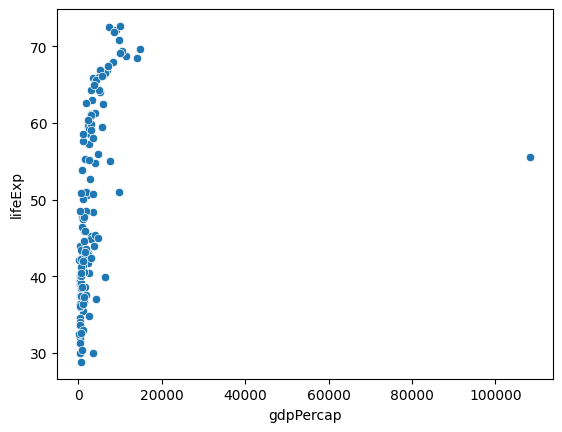

In [ ]:
# view relationship between gdpPercap (quan) and lifeExp (quan)
sns.scatterplot(data=data1952, x='gdpPercap', y='lifeExp')

> As we can see, the gap in the `lifeExp` *(y axis)*, is very big, while there is one country at the very end of the line, all of the others are clustered on the lower end, making it very difficult to see any differnce in the GDP between the countries.

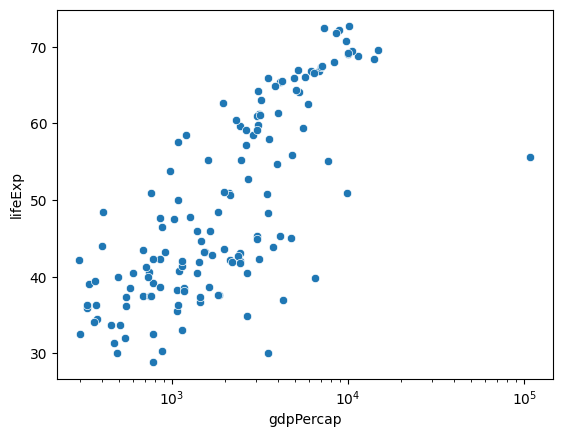

In [ ]:
sns.scatterplot(data1952, x='gdpPercap', y='lifeExp')
plt.xscale("log", base=10)
plt.show()

> We can apply `plt.xscale("log", base=10)` to apply base-10 logarithm to our *x axis*.

In [ ]:
fig_1 = px.scatter(data1952, x='gdpPercap', y='lifeExp', color='continent', hover_name='country', log_x=True)
fig_1.update_layout(width=600, height=400, title='GDP per capita vs Life Expectancy in 1952')

> ### Orrrrrr, we can plotly :)
>
> `log_x=True` automatically handles the mechanics and applies logarithm scaling and to our plot.
>
> As we can see, the differences in GDP of each country are way better to be intepretted now.
>
> As for the trend, we tend to see, Africa seems to be on the lower end, while European countries seems to have both high life Expectancy and GDP.
>
>`hover_name='country` let us hover over each point to see the country name. Kuwait is the one who was topping the GDP list!

> NOTE: Plotly's commands are very similar to those of Seaborn's.
>
> I used to think that Plotly was so so so complicated. Such a relief to learn about this 😊

In [ ]:
# View relation between gdpPercap and pop
fig_2 = px.scatter(data1952, x='gdpPercap', y='pop', log_x=True, log_y=True, color='continent', hover_name='country')

# Reason why we log both X and Y, because there is a weird outlier in X, and also in Y
fig_2.update_layout(width=600, height=400, title='GDP per capita and population in 1952')

# In most Ipython Kernel (like Jupyter): fig.show() in optional
fig_2.show()

> GDP per capita and Population seems to have no correlation whatsoever...

In [ ]:
# View relation between lifeExp and pop
fig_3 = px.scatter(data1952, x='lifeExp', y='pop', hover_name='country', color='continent', log_y=True)
fig_3.update_layout(width=600, height=400, title='Life Expectancy vs Population in 1952')

In [ ]:
print(data1952['lifeExp'].corr(data1952['pop']))

-0.0027247818058784394


In [ ]:
# Do they look different from year 2007?
data2007 = data.query("year == 2007")
data2007.head()

,country,continent,year,lifeExp,pop,gdpPercap
11,Afghanistan,Asia,2007,43.828,31889923,974.580338
23,Albania,Europe,2007,76.423,3600523,5937.029526
35,Algeria,Africa,2007,72.301,33333216,6223.367465
47,Angola,Africa,2007,42.731,12420476,4797.231267
59,Argentina,Americas,2007,75.320,40301927,12779.379640


- According to the data, in 1952:
    - Which country was the richest?
    - Which country was the poorest?
    - Which country was the healthiest?
    - Which country was the unhealthiest?

In [ ]:
# Richest country
data1952[data1952['gdpPercap'] == data1952['gdpPercap'].max()]

# SQL WAY TO DO IT
data1952.query('gdpPercap == gdpPercap.max()')

,country,continent,year,lifeExp,pop,gdpPercap
852,Kuwait,Asia,1952,55.565,160000,108382.3529


In [ ]:
# Find both min and max
data1952.query("gdpPercap == [gdpPercap.min(), gdpPercap.max()]")

,country,continent,year,lifeExp,pop,gdpPercap
852,Kuwait,Asia,1952,55.565,160000,108382.352900
876,Lesotho,Africa,1952,42.138,748747,298.846212


In [ ]:
# Poorest country
data1952.query('gdpPercap == gdpPercap.min()')

,country,continent,year,lifeExp,pop,gdpPercap
876,Lesotho,Africa,1952,42.138,748747,298.846212


In [ ]:
# Healthiest and unhealthiest country
data1952.query("lifeExp == lifeExp.min() | lifeExp == lifeExp.max()")

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1140,Norway,Europe,1952,72.670,3327728,10095.421720


- Repeat the previous question for the year 1977. Before computing, can you guess which country had the lowest life expectancy around that year?

In [ ]:
# Repeat the process for year 1977
data1977 = data[data['year'] == 1977]
data1977.head()

,country,continent,year,lifeExp,pop,gdpPercap
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
17,Albania,Europe,1977,68.930,2509048,3533.003910
29,Algeria,Africa,1977,58.014,17152804,4910.416756
41,Angola,Africa,1977,39.483,6162675,3008.647355
53,Argentina,Americas,1977,68.481,26983828,10079.026740


In [ ]:
data1977.query("lifeExp == lifeExp.min()")

,country,continent,year,lifeExp,pop,gdpPercap
221,Cambodia,Asia,1977,31.22,6978607,524.972183


In [ ]:
data1977.query("lifeExp == lifeExp.min() | lifeExp == lifeExp.max()")

,country,continent,year,lifeExp,pop,gdpPercap
221,Cambodia,Asia,1977,31.22,6978607,524.972183
689,Iceland,Europe,1977,76.11,221823,19654.962470


In [ ]:
gapminder.query("year == 1977").query("gdpPercap == [gdpPercap.min(), gdpPercap.max()]")

,country,continent,year,lifeExp,pop,gdpPercap
857,Kuwait,Asia,1977,69.343,1140357,59265.47714
1049,Myanmar,Asia,1977,56.059,31528087,371.00000


In [ ]:
from plotly.subplots import make_subplots
import plotly.express as px
import pandas as pd

In [ ]:
# 1952 plots
figures = [fig_1,
           fig_2,
           fig_3]

# To add titles, and pass to fig (make_subplots)
titles = ['GDP per capita VS Life Expectancy in 1952', 'GDP per capita VS Life Expectancy in 2007',
          'GDP per capita VS Population in 1952', 'GDP per capita VS Population in 2007',
          'Life Expectancy VS Population in 1952', 'Life Expectancy VS Population in 2007']

fig = make_subplots(rows=len(figures), cols=2, subplot_titles=titles)

for i, figure in enumerate(figures):
  for j, trace in enumerate(figure['data']):
    # print(trace)
    if i > 0:     # to show legend only on the first plot (1, 1): first row, first column (tho Python index starts from 0 - that's why we added one in the .addtrace(trace, row, col))
      trace.showlegend = False
    fig.add_trace(trace, row=i+1, col=1)

# 2007 plots
data2007 = data.query('year == 2007')

  # No need to provide logarithm scaling, since it doesn't record as traces (for some reason)
  # HOWEVER, update_x/yaxes will handle the JOB (yayyyyy)
fig_4 = px.scatter(data2007, x='gdpPercap', y='lifeExp', color='continent', hover_name='country')
fig_5 = px.scatter(data2007, x='gdpPercap', y='pop', color='continent', hover_name='country')
fig_6 = px.scatter(data2007, x='lifeExp', y='pop', color='continent', hover_name='country')

figures_1977 = [fig_4, fig_5, fig_6]

for i, figure in enumerate(figures_1977):
  # print(figure)
    # each Figure consist of data and layout dict
    # but we only want the data dict (figure['data']) since it contains most (all) of the info
  for j, trace in enumerate(figure['data']):
    # print(j, trace) : to see what each of the traces include.
      # Traces are basically the attributes of each figure that make up the figure
    trace.showlegend = False
    fig.add_trace(trace, row=i+1, col=2)

fig.update_xaxes(type='log') # IT IS TOO SMART,
fig.update_yaxes(type='log') # they automatically apply logarithmic scaling to the axis that needed it 😭
fig.update_layout(height=1000, width=1000, showlegend=True)
fig.show()


## Do they look different from year 2007?


> ### A lot of difference, indeed, between the continents
>
> - GDP vs LifeExp: We can see that both GDP and LifeExp increased dramatically for almost all countries. However, the most notable difference, is that Africa is REALLY LACKING BEHIND...
> - GDP vs Population: Both GDP and Population really grew significantly. In 1952, China and India were only at 500m+ and 300m+ population, respectively. However, in 2007, both jumped high to over 1B+ population, while there GDP, just like the other countries also grew.
> - LifeExp vs Population: Health conditions really did improve significantly. While almost half of the world's countries' LifeExp were at around 40 or below in 1952, this changed entirely, as only one country were below the 40 mark in 2007. Also, not a single country reached 75 year of LifeExp in 1952, though in 2007, most countries clustered at this value or higher.

### **B.2. Quatitative vs qualitative**

- We observed differences in health conditions across continents in 2007. Was this also the case in 1952? Please visualize your findings.
- What about the economy? Visualize and explain your results.

In [ ]:
cat_ord = data1952.groupby('continent')['lifeExp'].mean().sort_values()
cat_ord

,lifeExp
continent,
Africa,39.135500
Asia,46.314394
Americas,53.279840
Europe,64.408500
Oceania,69.255000


In [ ]:
# Health conditions vs economy across continents
fig_7 = px.box(data1952,
               x='continent',
               y='lifeExp',
               hover_name='country',
               color='continent',
               points='all', # points visualize the points(country) (can be all, outliers...)
              #  category_orders={'continent': sorted(data1952['continent'])} # sort by alphabetical order
               category_orders={'continent': cat_ord.index}                   # sort by mean values

        )

fig_7.update_layout(width=600, height=400, title='Life Expectancy across different continents in 1952')

In [ ]:
cat_ord = data1952.groupby('continent')['lifeExp']\
.mean()\
.sort_values()

cat_ord

,lifeExp
continent,
Africa,39.135500
Asia,46.314394
Americas,53.279840
Europe,64.408500
Oceania,69.255000


In [ ]:
cat_ord_2007 = data2007.groupby('continent')['lifeExp'].mean().sort_values()
cat_ord_2007

,lifeExp
continent,
Africa,54.806038
Asia,70.728485
Americas,73.608120
Europe,77.648600
Oceania,80.719500


In [ ]:
fig_8 = px.box(
    data_frame=data2007,
    x='continent',
    y='lifeExp',
    color='continent',
    points='all',
    category_orders={'continent': cat_ord_2007.index}
)

fig_8.update_layout(width=600, height=400, title='Life Expectancy across different continents in 2007')

fig_8.show()

In [ ]:
titles_ql_n_qn = ['Life Expectancy across different continents in 1952', 'Life Expectancy across different continents in 2007']

fig_ql_n_qn = make_subplots(rows=1, cols=2, subplot_titles=titles_ql_n_qn)

figures_ql_n_qn = [fig_7, fig_8]

for i, figure in enumerate(figures_ql_n_qn):
    for trace in figure['data']:
        if i > 0:
            trace.showlegend = False
        fig_ql_n_qn.add_trace(trace, row=1, col=i+1)

# matches='y' make it so that both y axes matches each other :)))))))))
    # matches='x' if we applying to update_xaxes
fig_ql_n_qn.update_yaxes(matches='y', title_text='Life Expectancy (years)')
fig_ql_n_qn.update_xaxes(title_text='Continent')

fig_ql_n_qn.update_layout(height=500, width=1000)

> ### Findings: Improvement in Health condidtions in all continents! 👏
> #### Although Africa still catching up!

- ### What about the economy? Visualize and explain your results.

In [ ]:
# co52 = data1952.groupby('continent')['gdpPercap'].mean().sort_values()
# co07 = data2007.groupby('continent')['gdpPercap'].mean().sort_values()


co52 = data1952.groupby('continent')['gdpPercap'].median().sort_values()
co07 = data2007.groupby('continent')['gdpPercap'].median().sort_values()

print(co52, co07)

# mean and median plays a role here

continent
Africa        987.025569
Asia         1206.947913
Americas     3048.302900
Europe       5142.469716
Oceania     10298.085650
Name: gdpPercap, dtype: float64 continent
Africa       1452.267078
Asia         4471.061906
Americas     8948.102923
Europe      28054.065790
Oceania     29810.188275
Name: gdpPercap, dtype: float64


> ### **mean** and **median** plays a **difference** here!
>
> If applied mean, Asia has more GDP than the Americas
> Though, it can be said the opposite, if we apply median.
>
> This is because of the **extreme** outlier of Kuwait in Asia.

> The Boxplot visualization displays median, not the mean, so that's why applying mean might make it look weird (seeing Asia after the Americas)

In [ ]:
# Economy by different continent in 1952 VS 2007

    # fig_9 economy in 1952
fig_9 = px.box(
    data_frame=data1952,
    x='continent',
    y='gdpPercap',
    color='continent',
    points='all',
    hover_name='country',
    category_orders = {
        'continent': co52.index
    },
    log_y=True
)

    # fig_10 economy in 2007
fig_10 = px.box(
    data_frame=data2007,
    x='continent',
    y='gdpPercap',
    points='all',
    hover_name='country',
    color='continent',
    category_orders={
        'continent': co07.index
    }
)

titles_econ_52_n_07 = ['GDP per capita in 1952', 'GDP per capita in 2007']

fig_econ_52_n_07 = make_subplots(rows=1, cols=2, subplot_titles=titles_econ_52_n_07)

fig_econ_52_n_07.add_traces(fig_9['data'], rows=1, cols=1)

for trace in fig_10['data']:
    trace.showlegend = False

fig_econ_52_n_07.add_traces(fig_10['data'], rows=1, cols=2)

fig_econ_52_n_07.update_yaxes(
    type='log',
    matches='y',
    title_text='GDP per capita ($)'
)

fig_econ_52_n_07.update_layout(
    title={
        'text':'GDP per capita in different continents in 1952 and 2007',
        'x': 0.5,               # positions the title at the center (0=left, 0.5=center, 1=right)
        'xanchor': 'center',    # ensures the center of the text is *anchored* at that position (itc, 0.5)
        'yanchor': 'top'
    }
)

> ### Observation: GDP in each continent had grown dramatically, except for Africa...

> In 1952, it seems as though the cap was at 10k GDP (with a few outliers over 10k and one country at the extreme 100k). However, 10k GDP is only around the median or the third quartile for all continents, except for Africa with the upper fence reaching only 7k GDP.

### **B.3. Qualitative vs qualitative**

Qualitative variables are simpler than quantitative ones, as we primarily focus on the proportion or frequency of each category. In our dataset, the existing qualitative variables are not suitable for analysis because they are repeated each year. Therefore, we will create a new qualitative `lifeExp`.

- Add to the data `data1952` a column `lifeExpQual` containing three categories: [**"unhealthy"**, **"moderate"**, **"healthy"**] by splitting `lifeExp` into 3 classes.

> Hint: you may cheat using [slide 15](https://hassothea.github.io/Data_Analysis_AUPP/Slides/Data_Visualization.html#/bivariate-visualization-8). The function `pd.qcut` is helpful for such a task.

- Graphically represent the connection between `lifeExpQual` and `continent` in year 1952.
- Describe what you see.

In [ ]:
# To do
# qualitative and qualitative, the charts we use are:
    # Mosaic plot
    # Stacked or Grouped Barplots
    # heatmap, to some extent ()

In [ ]:
# Represent the connection between lifeExpQual and continent

# pd.cut: quantile-based discretization. Just means that it it divides data into bins that have an equal number of observations in each bin
    # In this case, divide into 3 quantiles (33.33% each)

lifeExpQual_labels = ["unhealthy", "moderate", "healthy"]
data1952['lifeExpQual'] = pd.qcut(x=data1952['lifeExp'], q=3, labels=lifeExpQual_labels)

lifeExpQual_by_continent = data1952.groupby('continent')['lifeExpQual'].value_counts().reset_index()
    # .reset_index() generates a new DataFrame or Series with the index reset
    # without it, .groupby()[] makes it as a GroupBy object.
    # the new df now now has 3 columns: continent, lifeExpQual, and count (from value_counts())

continent_order = lifeExpQual_by_continent.groupby('continent')['count'].sum().sort_values(ascending=False).index
    # This is just to order the continent by number of countries :)

# We use stacked bar plot
fig_11 = px.bar(
    data_frame=lifeExpQual_by_continent,
    x='continent',
    y='count',
    color='lifeExpQual',
    color_discrete_map={            # maps the color to represent categorical data using discrete colors
        'unhealthy': "#D13821",
        'moderate': "#FFFB00",
        'healthy': '#179C5E'
    },                              # there is also color_continuous_map, which is useful for line-series
    category_orders={
        'lifeExpQual': lifeExpQual_labels,
        'continent': continent_order
    },
    # barmode='group'               # If we want group bar plots
)

fig_11.update_layout(
    height=400,
    width=800,
    title='Health Conditions Across Continents in 1952 (Stacked)'
)
fig_11.show()


/tmp/ipython-input-642041392.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



> ### Let's subplots 3 of the common plots :D

> - #### Groupbed Bar Plots

In [ ]:
import plotly.graph_objects as go
fig_11_grouped = go.Figure(fig_11) # This just straight up the Figure of fig_11
fig_11_grouped.update_layout(
    barmode='group',
    title='Health Conditions Across Continents in 1952 (Grouped)'
)
    # WOWWWWW, how easy this is hahaha

> - #### Mosaic Plot

/tmp/ipython-input-2975364902.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



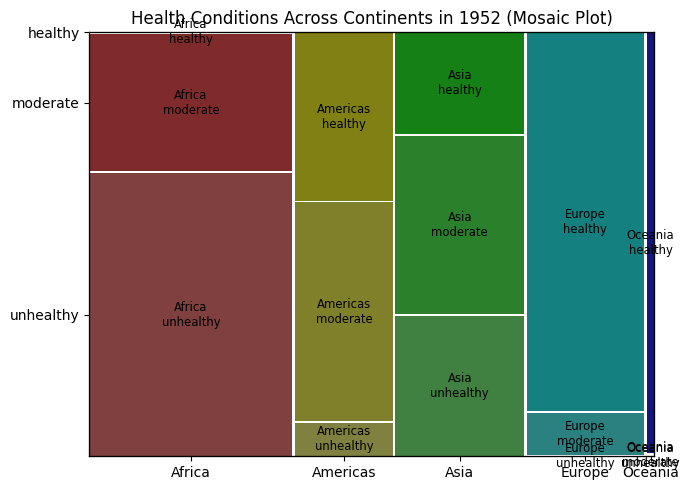

In [ ]:
# Plotly doesn't have a mosaic (only statsmodels have)
from statsmodels.graphics.mosaicplot import mosaic

mosaic_data = data1952.groupby(['continent', 'lifeExpQual']).size()
    # .gropby() 2 columns means that each group is a unique combination of (continent, lifeExpQual)
        # EX: Groups: (Africa, unhealthy), (Africa, moderate)...
            # .groupby() 1 column would group: Africa (with lifeExpQual values), Americas (with lifeExpQual)...
    # .size() returns the total number of elements
        # In our case, .size() would also work on .groupby() 1 column (like what we did previously)

fig, ax = plt.subplots(figsize=(7, 5))
mosaic(
    data=mosaic_data,
    ax=ax,
    title='Health Conditions Across Continents in 1952 (Mosaic Plot)'
)

plt.tight_layout()
plt.show()

## Describe what see:
> From the graph, we can see that not A SINGLE country in Africa reached the 'Healthy' condition, while there is quite a balance in Asia. Only 2 countries were considered in the Americas, while Europe and Oceania all rose without the 'Unhealthy' condition, with Oceania having both their 2 countries at the 'Healthy' condition.   

## **C. Time evolution**

`Gapminder` captures global changes from $1952$ to $2007$. It is more insightful to examine how these variables evolve over time.

### **C.1. Evolution of average `lifeExp` of the $5$ continents**

1. Create a line plot of `lifeExp` for the five continents from $1952$ to $2007$ using `sns.lineplot`. What observations can you make from the plot?

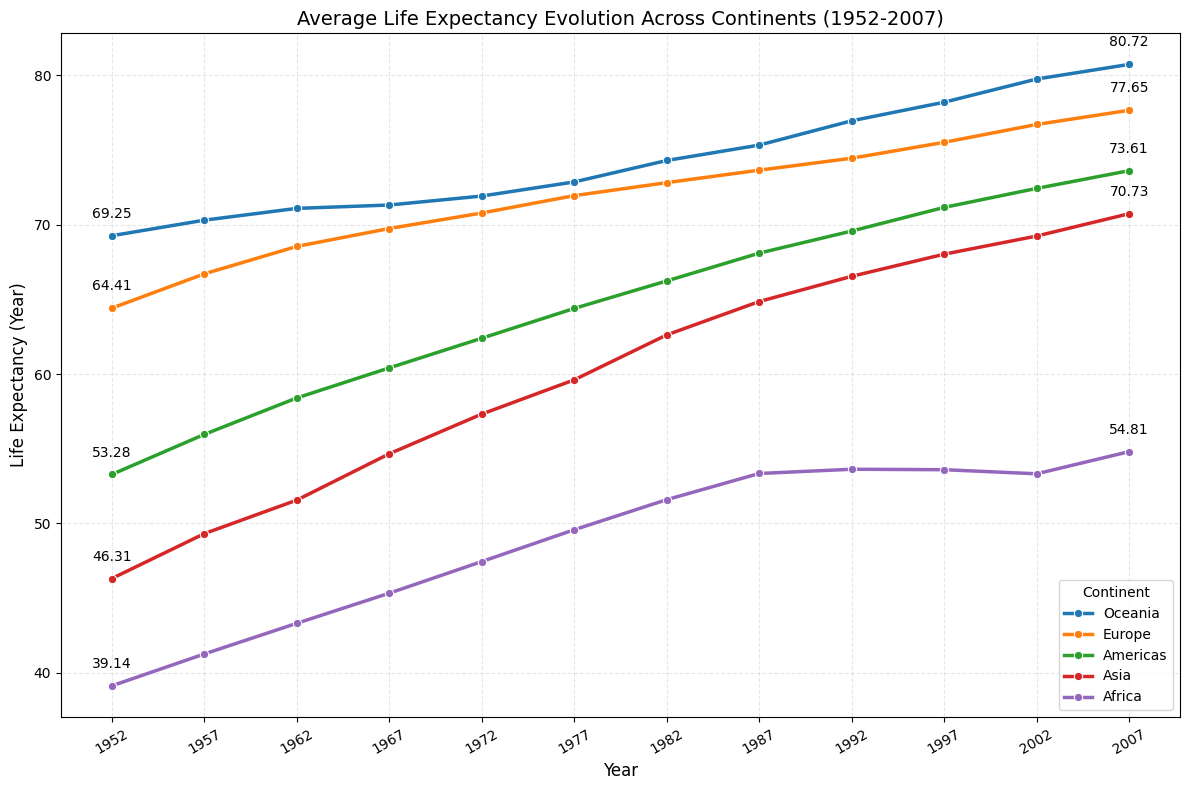

In [ ]:
# line plot of lifeExp for the five continents (using sns.lineplot)
continent_hue_order = data.groupby('continent')['lifeExp'].mean().sort_values(ascending=False).index.tolist()

# the main plot maker
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=data,
    x='year',
    y='lifeExp',
    hue='continent',
    hue_order=continent_hue_order,
    marker='o',
    linewidth=2.5,
    errorbar=None       # to remove the lighter colored area around the lines. By default, it shows the 95% confidence interval
)

# adding label to the lower and upper end year (1952 and 2007)
    # First, we query for only the min and max year
data_labeled = data.query('year == [year.min(), year.max()]')
# data_labeled.tail()

    # Then we take lifeExp to groupby 'year and continent'
    # We reset_index() to make it become a DataFrame
data_labeled = data_labeled.groupby(['year', 'continent'])['lifeExp'].mean().reset_index()
# data_labeled

for continent in continent_hue_order:
    continent_data = data_labeled[data_labeled['continent'] == continent]
    for i, row in continent_data.iterrows():    # iterrows(): iterate rows of df as pairs of (index, Series object)
        plt.text(
            x=row['year'],
            y=row['lifeExp'] + 1,               # + 1 (called offset) to move text up a bit - for more space
            s=f"{row['lifeExp']:.2f}",          # text (string) to display
            ha='center',
            va='bottom'                         # bottom of text aligns with the y position
                                                # if va='top': the top edge of the text is at the y coordinate, so text appears *below the point*
        )

# Customzing layouts
plt.title("Average Life Expectancy Evolution Across Continents (1952-2007)", fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Life Expectancy (Year)', fontsize=12)
plt.grid(ls='--', visible=True, alpha=0.3)

# the values of each axes' label is called tick marks.
    # ngl, this kinda look ugly 😭, because there are too many ticks, and our grid grids too frequent
plt.xticks(
    ticks=sorted(data['year'].unique()),
    rotation=30
)

plt.legend(title='Continent', loc='lower right')
plt.tight_layout()
plt.show()

> ### Observation: Honesly, this is a pleasant to see!
>
> From the line chart, all of the continents saw an almost consistent upward trend. Asia saw the most improvement coming from just 46 year of Expectancy in 1952 to the high of 70 year of life expectancy in 2007. Africa, Americas, Europe, and Oceania also saw dramatic increases. Although Africa also saw an increase, they were still at the bottom, and the number is not too good, with overall life expectancy reaching not even 55 years of age.

### **C.2. Other variables**

- Repeat the same process with `pop`, and then with `gdpPercap`. Provide your comments for each case.

In [ ]:
# line series for pop, then with gdpPercap
pop_by_continent_data = data.groupby(['continent', 'year'])['pop'].sum().reset_index()
pop_by_continent_data

fig_pop_over_year = px.line(
    data_frame=pop_by_continent_data,
    x='year',
    y='pop',
    color='continent',
    category_orders={'continent': data.groupby('continent')['pop'].mean().sort_values(ascending=False).index.tolist()},
    markers=True,
    # log_y=True
)

fig_pop_over_year.update_layout(
    height=400,
    width=800,
    title='Total Population Across Continents (1952-2007)',
    legend={
        'title':'Continent'
    }
)

> ### Observation: Every continent saw an increase in their population. Although Asia takes a clear win here.
>
> Europe and Americas started out about the same at around 400m and 350m, respectively. Europe experience a slow increase to barely 600m, while Americas reached to just under 900m. Africa saw a notable increase, though, surpassing both Americas and Europe, reaching over 900m, despite starting at just 230m in 1952.
>
> Meanwhile, Asia grew from 1.4B to 3.8B during the time, while Oceania saw an increase of just over 10m population.

In [ ]:
# line series for gdpPercap
gdp_by_continent = data.groupby(['year', 'continent'])['gdpPercap'].sum().reset_index()
gdp_by_continent

fig_gdp_over_year = px.line(
    data_frame=gdp_by_continent,
    x='year',
    y='gdpPercap',
    color='continent',
    markers=True,
    title='GDP per capita across continents (1952-2007)',
    category_orders={
        'continent': gdp_by_continent.groupby('continent')['gdpPercap'].sum().sort_values(ascending=False).index.tolist()
    }
)

fig_gdp_over_year.update_xaxes(tickvals=gdp_by_continent['year'].unique())
fig_gdp_over_year.show()

> ### Observation: While all continents saw steady increase in GDP, Europe takes the fattest W among the others.
>
> Despite both Asia and Africa started at around 170k in 1952, Asia only managed to reach around 410k in 2007, while Europe increased to ALMOST HALF of Asia's. The other 3 continents all grew almost thrice of their GDP in 1952.

### **C.3. Cambodia**

- Plot the evolution of the three quantitative variables for **Cambodia**. What do you observe?

In [ ]:
data_cam_thai = data.query("country in ['Cambodia', 'Thailand']")

fig_ct_gdp = px.line(
    data_cam_thai,
    x='year',
    y='gdpPercap',
    color='country',
    markers=True,
    title='Evolution GDP per capita in Cambodia vs Thailand (1952-2007)'
)

fig_ct_gdp.update_xaxes(tickvals=data_cam_thai['year'].unique())
fig_ct_gdp.show()

> ## *GDP per capita in Cambodia vs Thailand (1952-2007)*
> ### **What a reality check... and honestly, this is sad to look at.**
>
> - In 1952, the gap in GDP was almost ***twice***, subtle but still noticable.
> - However, while **Thailand** was growing dramatically, **Cambodia** *struggles* to take a leap; the continuous war after the French rule in **Cambodia** contributed heavily to this.
> - **Cambodia** even saw a decrease in the 70s, due to the civil war and Khmer Rouge.
> - On the other hand, **Thailand** grew, consistently and dramatically grew until it reached almost ***$7.5k*** in 2007, despite starting at just around ***$750*** in 1952, seeing a ***10%*** increase over the years.
> - **Cambodia** started at around ***$370*** and reached hardly ***$1700***, just a bit over ***4.5%*** increase
> While the gap was only ***twice*** in 1952, this gap grew to over ***quadruple*** in 2007.
> #### P.S: indeed a sad information for us Cambodians. We have to be better.

In [ ]:
fig_ct_lifeExp = px.line(
    data_frame=data_cam_thai,
    x='year',
    y='lifeExp',
    color='country',
    markers=True,
    title='Evolution of Life Expectancy in Cambodia and Thailand (1952-2007)'
)

fig_ct_lifeExp.update_xaxes(tickvals=data_cam_thai['year'].unique())
fig_ct_lifeExp.show()

## *Life Expectancy in Cambodia and Thailand (1952-2007)*

### **The 10% is noticable from the beginning til end. It is also commendable from Cambodia to see such a rapid rise after the killing field period.**

> The trend is almost always consistent from both countries, despite the massive drop in 1977 from Cambodia, reaching a low of only 31 year of life expectancy. Other than that, Thailand's life expectancy stays almost 10 years more than Cambodia throughout the years.
> ### P.S: indeed another sad graph to look at

In [ ]:
fig_ct_pop = px.line(
    data_cam_thai,
    x='year',
    y='pop',
    color='country',
    markers=True,
    title='Evolution of Population in Cambodia and Thailand (1952-2007)'
)

fig_ct_pop.update_xaxes(tickvals=data_cam_thai['year'].unique())


## *Population in Cambodia and Thailand (1952-2007)*

### **Thailand increased dramatically, while Cambodia increased slowly, both seeing barely over 300% increase**

> Although both countries' population growth rate is about thrice the original amount, Thailand managed to gain over 40m population, while Cambodia went up to just 14m from 4.7m in 1952.

# Further readings
- Gapminder documentation: [https://www.gapminder.org/data/documentation/](https://www.gapminder.org/data/documentation/)
- A short demonstration video is available here: [Hans Rosling's 200 Countries, 200 Years, 4 Minutes - The Joy of Stats - BBC Four](https://youtu.be/jbkSRLYSojo?si=qipg08VIi999hEgo).
- Graphical tools:
    - [`matplotlib`](https://matplotlib.org/stable/index.html)
    - [`seaborn`](https://seaborn.pydata.org/)
    - [`https://plotly.com/python/`](https://plotly.com/python/)